<a href="https://colab.research.google.com/github/Ericharw/Desain-Web-Semsester-3/blob/main/Praktikum_2_ErichaRizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ericha Rizki Wardani

Kelas : TI 3C

NIM : 2341720202

**JOBSHEET 2 PEMAHAMAN DATA DAN PRA PENGOLAHAN DATA**

**PRAKTIKUM 1**

In [1]:
# Langkah 0 Persiapan Lingkungan
!pip install -q pandas matplotlib numpy

In [2]:
# Import library tersebut pada cell notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import library untuk manipulasi data dan visualisasi
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


**LANGKAH 1 - MEMBUAT DATA**

In [4]:
# Membaca file CSV dan menyimpannya dalam DataFrame 'df'
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
# Menampilkan 5 baris pertama dari dataset untuk preview data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Menampilkan 100 baris pertama (jika diperlukan lebih banyak data)
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


**LANGKAH 2 - INSPEKSI DATA**

**Pengecekan Dimensi**

In [7]:
# Mengecek dimensi dataset - mengembalikan tuple (jumlah baris, jumlah kolom)
df.shape

(891, 12)

**Pengecekan Tipe Data**

In [8]:
# Menampilkan informasi dataset - tipe data, jumlah non-null, penggunaan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Menghitung nilai missing untuk setiap kolom
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Ringkasan Nilai Statistik**

In [10]:
# Statistik deskriptif - mean, std, min, max, quartil untuk kolom numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**LANGKAH 3 - INSPEKSI VISUAL**

**Inspeksi Distribusi Data**

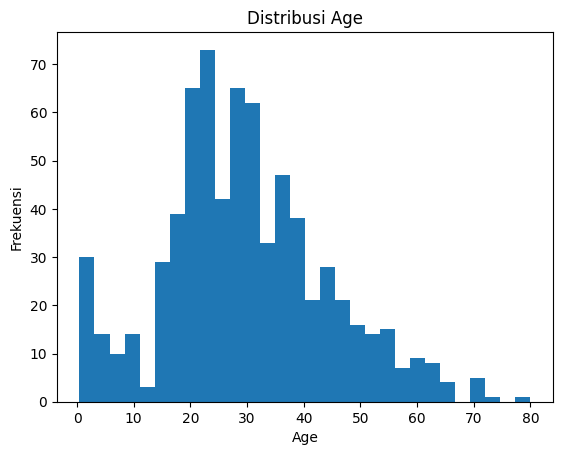

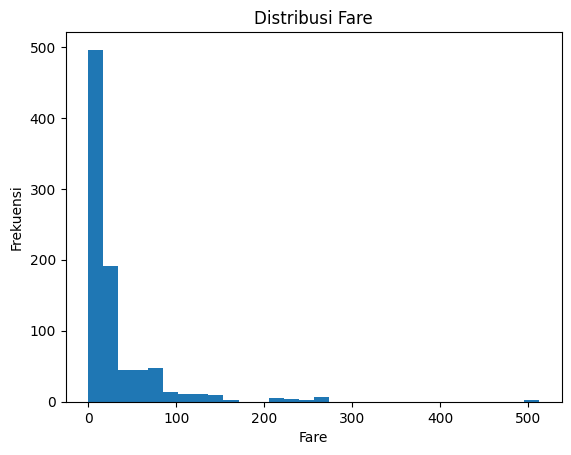

In [11]:
# Mendefinisikan kolom numerik yang akan diinspeksi
num_cols = ['Age','Fare']

# Membuat histogram untuk melihat distribusi setiap kolom numerik
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

**Inspeksi Outlier**

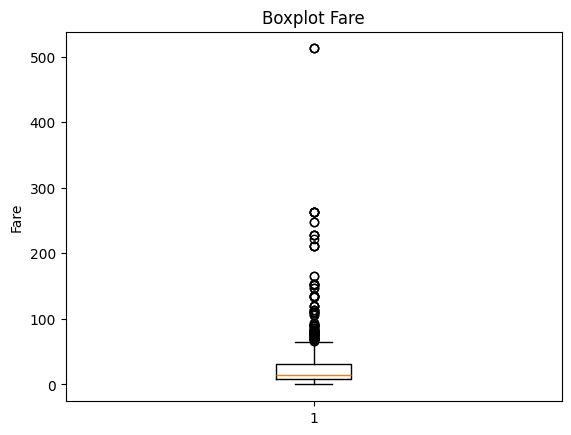

In [12]:
# Membuat boxplot untuk mendeteksi outlier pada kolom Fare
plt.figure()
plt.boxplot(df['Fare'].dropna(), vert=True)
plt.title('Boxplot Fare')
plt.ylabel('Fare')
plt.show()

**Inspeksi Komposisi Variabel Kualitatif**

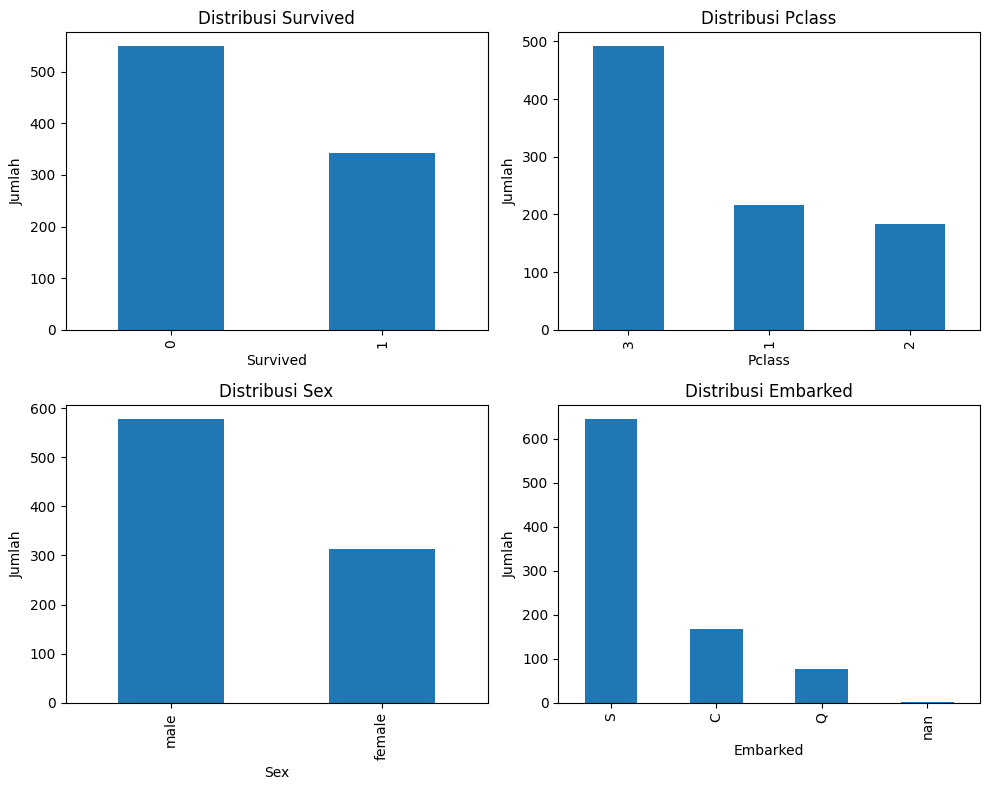

In [13]:
# Mendefinisikan kolom kategorikal untuk diinspeksi
cat_cols = ['Survived','Pclass','Sex','Embarked']

# Membuat subplot grid 2x2 untuk visualisasi multiple
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**INSPEKSI KORELASI**

**Heatmap**

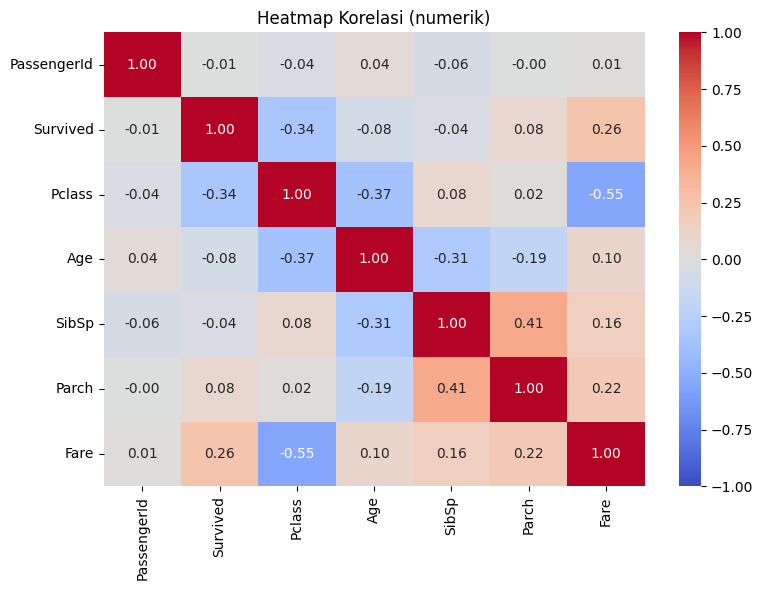

In [14]:
# Import seaborn untuk visualisasi yang lebih baik
import seaborn as sns

# Seleksi hanya kolom numerik dari dataset
num_only = df.select_dtypes(include=[np.number])
# Menghitung matriks korelasi antar kolom numerik
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
# Membuat heatmap korelasi dengan annotasi nilai
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

In [15]:
# Melihat korelasi dengan target (Survived) secara berurutan
corr['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


**Scatter Plot**

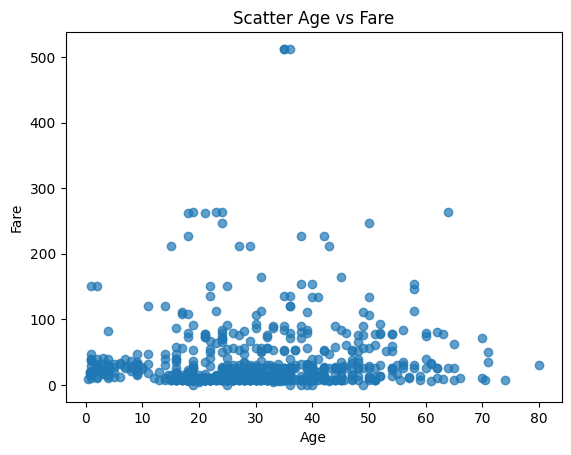

In [16]:
# Membuat scatter plot untuk melihat hubungan antara Age dan Fare
plt.figure()
surv_map = {0:'No', 1:'Yes'}
plt.scatter(df['Age'], df['Fare'], alpha=0.7)
plt.xlabel('Age'); plt.ylabel('Fare')
plt.title('Scatter Age vs Fare')
plt.show()

**PRAKTIKUM 2 - PRA PENGOLAHAN DATA - DATA TERSTRUKTUR**

**Data Imputation**

**Langkah 0 - Persiapan**

In [17]:
# Import library pandas untuk manipulasi data tabular
import pandas as pd
# Import library numpy untuk operasi numerik
import numpy as np

**Langkah 1 - Membuat Data**

In [18]:
# Membaca file CSV dan menyimpan dalam DataFrame 'df'
df = pd.read_csv('Titanic-Dataset.csv')

# Menampilkan 5 baris pertama untuk preview data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Langkah 2 - Inspeksi Data**

**Pengecekan Dimensi**

In [19]:
# Mengecek dimensi dataset - mengembalikan (jumlah baris, jumlah kolom)
df.shape

(891, 12)

**Pengecekan Tipe Data**

In [20]:
# Menampilkan informasi detail tentang tipe data dan jumlah non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
# Menghitung missing values untuk setiap kolom
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Ringkasan Nilai Statistik**

In [22]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Langkah 3 - Data Imputation**

In [23]:
# Mengisi missing values Age dengan nilai rata-rata (mean)
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Mengisi missing values Cabin dengan string "DECK"
# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Mengisi missing values Embarked dengan nilai paling sering muncul (modus)
# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

/tmp/ipython-input-2622169540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].mean(), inplace=True)
/tmp/ipython-input-2622169540.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

**Langkah 4 - Validasi Hasil**

In [24]:
# Memvalidasi hasil imputasi dengan mengecek kembali informasi dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,DECK,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,DECK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,DECK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,DECK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,DECK,C


**PRAKTIKUM 3 - SELEKSI FITUR, ENCODING, DAN STANDARDISASI**

**Seleksi Fitur**

In [25]:
# Import library untuk manipulasi data dan visualisasi
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset-fixed.csv to Titanic-Dataset-fixed.csv


**Langkah 1 - Load Data**

In [26]:
# Mendefinisikan path file dataset yang sudah difixed
dpath = '/content/Titanic-Dataset-fixed.csv'
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(dpath)
# Menampilkan 5 baris pertama untuk preview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


**Langkah 2 - Slice Data**

In [27]:
# Seleksi kolom yang akan digunakan sebagai fitur
# Menyimpan hanya 5 kolom yang relevan untuk analisis
# 'Survived' sebagai target variable
# 'Pclass', 'Age', 'Sex', 'Cabin' sebagai feature variables
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


**Langkah 3 - Encoding**

In [29]:
# Import LabelEncoder dari scikit-learn
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder untuk transformasi kategorikal ke numerik
le = LabelEncoder() # membuat objek dari LabelEncoder

# Mengubah 'Sex' (Male/Female) menjadi nilai numerik (0/1)
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding

# Mengubah 'Cabin' (kategori kabin) menjadi nilai numerik
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding
# fit_transform() melakukan fitting dan transformasi sekaligus

**Langkah 4 - Verifikasi Hasil**

In [30]:
# Memverifikasi hasil encoding dengan melihat 5 data pertama
# Memastikan 'Sex' dan 'Cabin' sudah berubah menjadi numerik
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


**Langkah 5 - Standarisasi**

In [32]:
# Import StandardScaler dari scikit-learn
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler untuk standardisasi
# Standarisasi kolom 'Age' agar memiliki mean=0 dan std=1
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

**Langkah 6 - Verifikasi Hasil Standarisasi**

In [33]:
# Memverifikasi hasil standardisasi dengan melihat 5 data pertama
# Memastikan 'Age' sudah terstandarisasi (nilai sekitar -1 sampai 1)
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


**PRAKTIKUM 4 PRA PENGOLAHAN DATA - DATA TIDAK TERSTRUKTUR**

**Langkah 0 - Persiapan**

In [34]:
# Instalasi OpenCV dan Matplotlib dengan mode quiet (-q)
!pip install -q opencv-python matplotlib

In [35]:
# Import OpenCV untuk pengolahan gambar
import cv2
# Import Matplotlib untuk visualisasi gambar
import matplotlib.pyplot as plt

**Langkah 1 - Load Gambar**

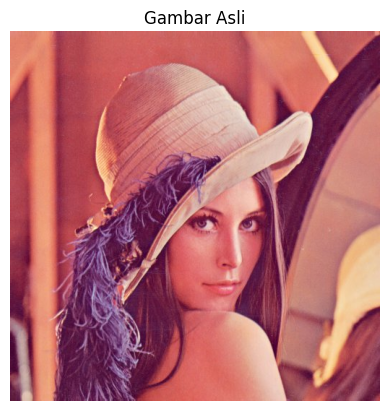

In [38]:
# Membaca gambar (BGR default di OpenCV)
img = cv2.imread("/content/sample_data/Lenna.png")

# Konversi BGR → RGB (agar warnanya tampil benar di matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menampilkan gambar menggunakan matplotlib
# axis("off") menghilangkan sumbu koordinat
# Tampilkan
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

**Langkah 2 - Resize Gambar**

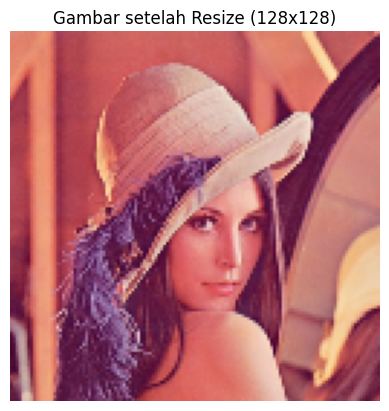

In [39]:
# Mengubah ukuran gambar menjadi 128x128 pixel
# cv2.resize() fungsi OpenCV untuk resize
# Resize gambar
img_resized = cv2.resize(img_rgb, (128, 128))

# Menampilkan gambar yang sudah di-resize
plt.imshow(img_resized)
plt.title("Gambar setelah Resize (128x128)")
plt.axis("off")
plt.show()

**Langkah 3 - Ubah ke Grayscale**

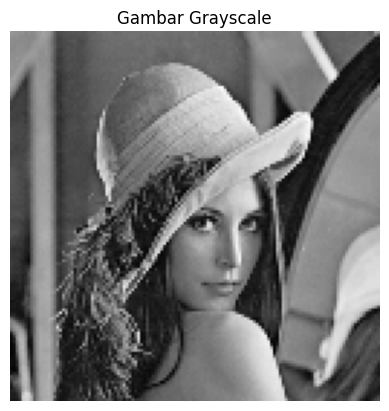

In [40]:
# Mengubah gambar berwarna menjadi grayscale
# Konversi ke grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar grayscale
# cmap="gray" untuk colormap grayscale
plt.imshow(img_gray, cmap="gray")
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()

**TUGAS PRAKTIKUM**

**DESKRIPSI TUGAS**

Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

2. Lakukan proses encoding pada kolom "diagnosis".

3. Lakukan proses standardisasi pada semua kolom yang memiliki nilai numerik.

**Langkah 0 - Import Library dan Load Data**

In [42]:
!pip install -q pandas matplotlib numpy

In [43]:
# Instalasi library pandas, matplotlib, dan numpy dengan mode quiet (-q)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Import library untuk manipulasi data dan visualisasi
from google.colab import files
uploaded = files.upload()

Saving wbc.csv to wbc.csv


In [45]:
# Load dataset Wisconsin Breast Cancer
df = pd.read_csv('wbc.csv')

# Tampilkan 5 data pertama
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**1. Pisahkan Variabel yang dapat dan Tidak dapat Digunakan**

In [46]:
# Menampilkan semua nama kolom yang ada dalam dataset
print("Kolom yang ada dalam dataset:")
print(df.columns.tolist())

# Menghapus kolom 'id' karena hanya berisi identifier unik yang tidak berguna untuk analisis
# Menghapus kolom 'Unnamed: 32' karena semua nilainya NaN (tidak ada data)
df_clean = df.drop(columns=['id', 'Unnamed: 32'])

# Menampilkan kolom yang tersisa setelah pembersihan
print("\nKolom setelah cleaning:")
print(df_clean.columns.tolist())
# Menampilkan dimensi dataset setelah pembersihan
print(f"\nShape setelah cleaning: {df_clean.shape}")

# Menampilkan 5 data pertama dari dataset yang sudah dibersihkan
print("\n5 data pertama setelah pemisahan variabel:")
df_clean.head()

Kolom yang ada dalam dataset:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Kolom setelah cleaning:
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', '

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2. Encoding pada Kolom "diagnosis"**

In [47]:
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik
le = LabelEncoder()
# Mengubah nilai 'B' (Benign) menjadi 0 dan 'M' (Malignant) menjadi 1
df_clean['diagnosis'] = le.fit_transform(df_clean['diagnosis'])

# Menampilkan mapping hasil encoding (B -> 0, M -> 1)
print("Mapping encoding:")
print(dict(zip(le.classes_, le.transform(le.classes_))))
# Menampilkan distribusi nilai diagnosis setelah encoding
print("\nDistribusi diagnosis setelah encoding:")
print(df_clean['diagnosis'].value_counts())
# Menampilkan 5 data pertama setelah proses encoding
print("\n5 data pertama setelah encoding:")
df_clean.head()

Mapping encoding:
{'B': np.int64(0), 'M': np.int64(1)}

Distribusi diagnosis setelah encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64

5 data pertama setelah encoding:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3. Standarisasi pada Semua Kolom Numerik**

In [48]:
# Membuat objek StandardScaler untuk standardisasi data
scaler = StandardScaler()
# Memilih semua kolom kecuali 'diagnosis' untuk distandardisasi
numeric_features = df_clean.columns.drop('diagnosis')
# Melakukan standardisasi: mengubah data sehingga mean = 0 dan standard deviation = 1
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

# Memverifikasi bahwa standardisasi berhasil
print("Verifikasi standardisasi:")
# Mean seharusnya mendekati 0 setelah standardisasi
print("Rata-rata mean fitur numerik (~0):", df_clean[numeric_features].mean().mean())
# Standard deviation seharusnya mendekati 1 setelah standardisasi
print("Rata-rata std fitur numerik (~1):", df_clean[numeric_features].std().mean())
# Menampilkan 5 data pertama setelah proses standardisasi
print("\n5 data pertama setelah standardisasi:")
df_clean.head()

Verifikasi standardisasi:
Rata-rata mean fitur numerik (~0): -6.795319368063057e-17
Rata-rata std fitur numerik (~1): 1.000879894582902

5 data pertama setelah standardisasi:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**KESIMPULAN**

**Ringkasan Tugas**
1. Pemisahan Variabel
*   Kolom id dihapus karena hanya identifier yang tidak berguna untuk analisis
*   Kolom Unnamed : 32 dihapus karena semua nilai NaN (data hilang)

2. Encoding Diagnosis
*   B (Benign) --> dikonversi menjadi 0
*   M (Malignant) --> dikonversi menjadi 1
*   Data kategorikal diubah menjadi numerik untuk pemrosesan machine learning.

3. Standarisasi Numerik
*   Semua 30 fitur numerik distandardisasi menggunakan StandardScaler
*   Standarisasi membuat mean = 0 dan standard deviation = 1
*   proses ini membuat semua fitur memiliki skala yang sama untuk analisis yang lebih baik











**HISTOGRAM**

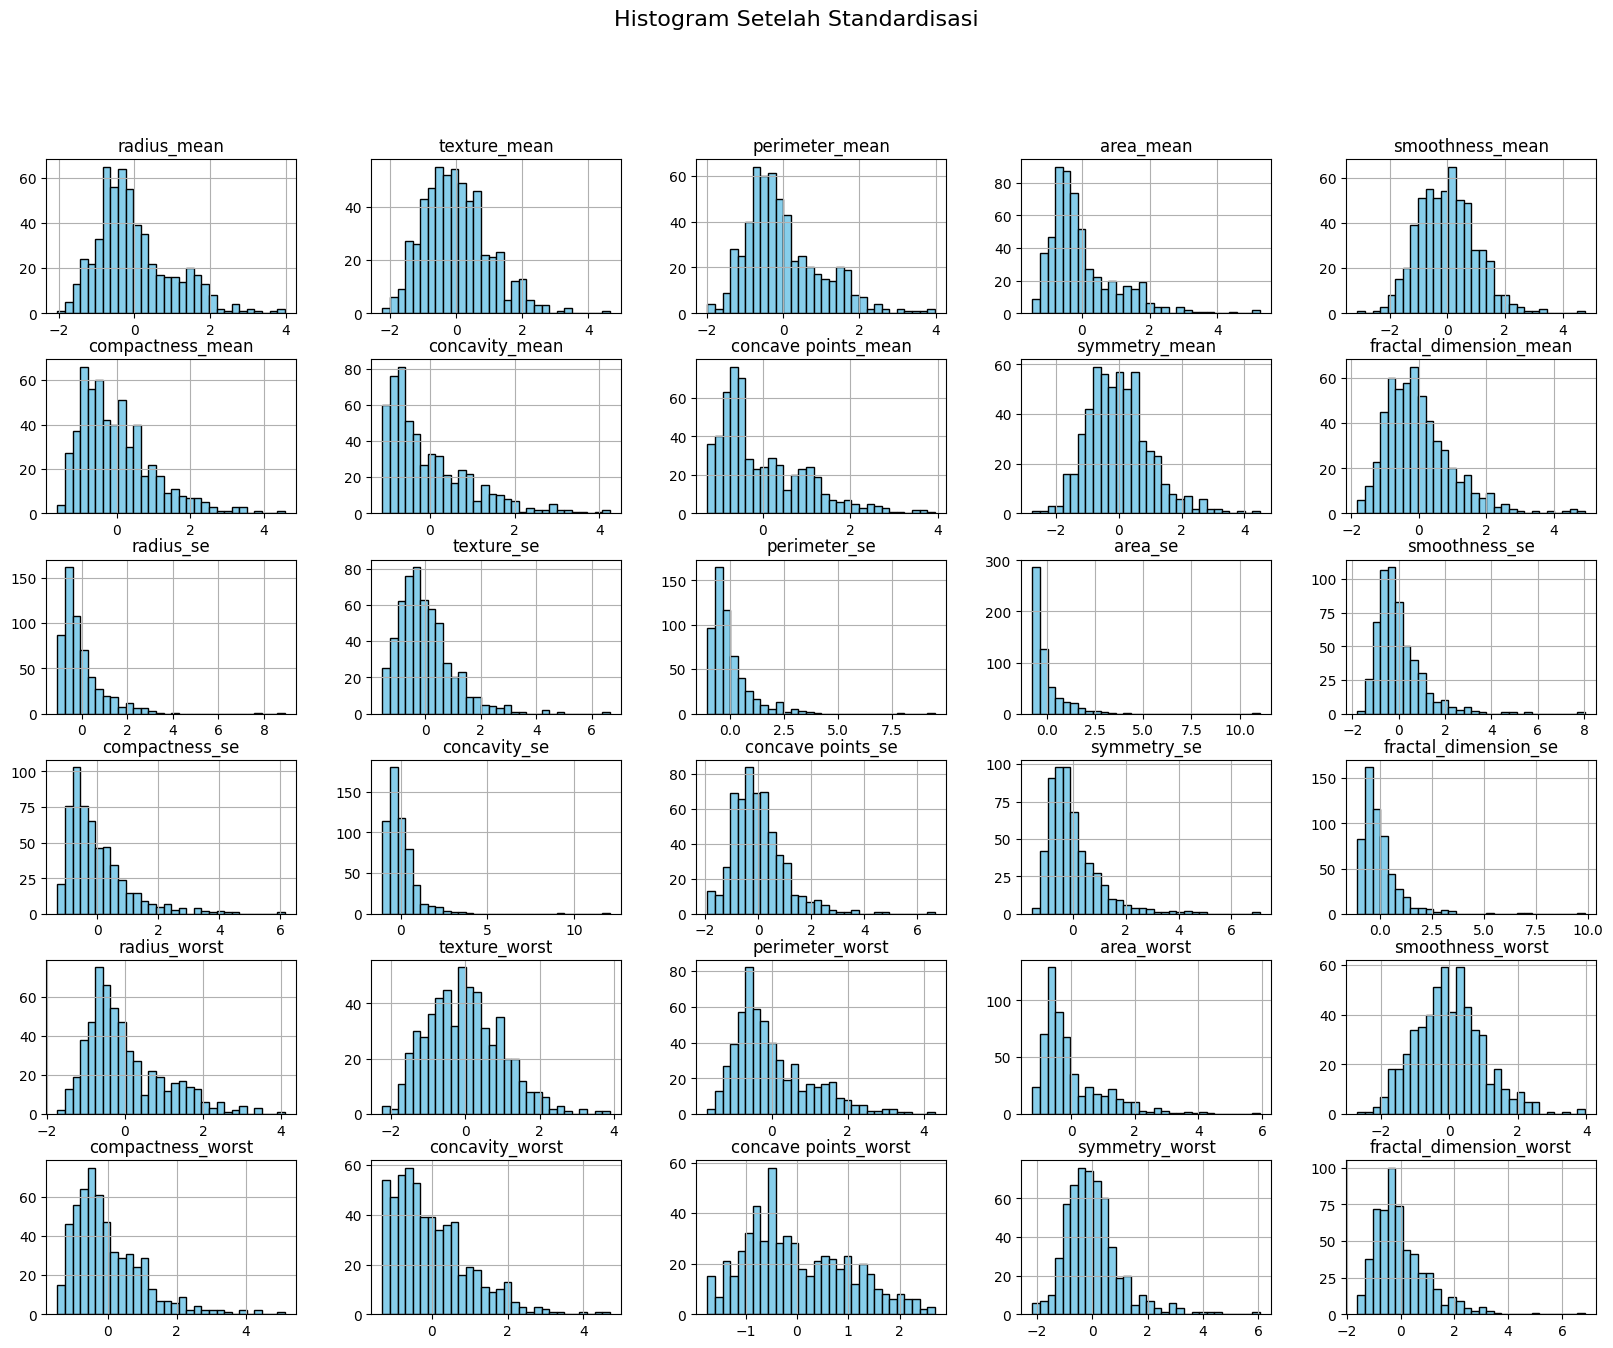

In [49]:
import matplotlib.pyplot as plt

# Definisikan kolom numerik (semua kolom kecuali 'diagnosis')
num_cols = [col for col in df_clean.columns if col != 'diagnosis']

# Plot histogram semua fitur numerik setelah standardisasi
df_clean[num_cols].hist(bins=30, figsize=(20, 15), color="skyblue", edgecolor="black")

# Atur judul dan layout
plt.suptitle("Histogram Setelah Standardisasi", fontsize=16)
plt.show()